***
# Short demonstration of the ATMODAT Standard Compliance Checker ![AtMoDat Image](https://www.dkrz.de/en/projects-and-partners/projects-1/atmodat-1/@@images/logo/preview)
<div align="center"><b> Angelika Heil, DKRZ TGIF Oct 1, 2021 </b></div>

***


<div class="alert-info" role="alert">
  <h4 class="alert-heading"><span style="font-family: Arial; font-size:1.4em;color:black;"> README</h4>
  <p><span style="font-family: Arial; font-size:1.0em;color:black;"> – For demonstration purposes, we prepared netCDF files created from CMIP6 model output, see Appendix. <br> 
      – In addition, we included a HD(CP)2-file.  <br>
      – Test netCDF are stored in the directory demo_data.  
  </p> 
      – To to execute BASH commands in a cell, put %%bash in the first line of that cell.</p>
  <hr>
</div>

### Step 1: Check available netCDF files in demo_data directory

using BASH listing command `ls`  (-lh option to print out details on files inlcuding human-readible file sizes)

#### Test files created from CMIP6 https://cera-www.dkrz.de/WDCC/ui/cerasearch/cmip6?input=CMIP6.CMIP.MPI-M.MPI-ESM1-2-HR.historical

In [4]:
%%bash
ls -lh demo_data/*.nc

-rw-r--r--  1 angelika  staff    48K  8 Sep 12:55 demo_data/ALL_ATMODAT_ATTRIBUTES.nc
-rw-r--r--  1 angelika  staff    51K  6 Sep 20:20 demo_data/CMIP6_ATTRIBUTES.nc
-rw-r--r--  1 angelika  staff    27K  6 Sep 20:20 demo_data/MINUM_ATMODAT_ATTRIBUTES.nc
-rw-r--r--  1 angelika  staff    26K  6 Sep 20:20 demo_data/NO_ATTRIBUTES.nc
-rw-r--r--  1 angelika  staff    27K  6 Sep 20:20 demo_data/WRONG_STANDARDNAME.nc


#### Test files created from https://cera-www.dkrz.de/WDCC/ui/cerasearch/entry?acronym=hope_trop_pyrnet01_l1_ta

In [5]:
%%bash
ls -lh demo_data/hope/*.nc

-rw-r--r--@ 1 angelika  staff   4,1M 29 Sep 09:38 demo_data/hope/hope_trop_pyrnet01_l1_ta_1.nc


### Step 2: Exploring netCDF file content with NCOs

using the BASH terminal command `ncdump -h`   (-h options means that only the netCDF header is shown)

#### Step 2.1: This is how the original metadata of a CMIP6 netCDF file look like

In [7]:
%%bash
ncdump -h demo_data/CMIP6_ATTRIBUTES.nc

netcdf CMIP6_ATTRIBUTES {
dimensions:
	time = UNLIMITED ; // (8 currently)
	lon = 11 ;
	bnds = 2 ;
	lat = 9 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:units = "days since 1850-1-1 00:00:00" ;
		time:calendar = "proleptic_gregorian" ;
		time:axis = "T" ;
	double lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
		lon:bounds = "lon_bnds" ;
	double lon_bnds(lon, bnds) ;
	double lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
		lat:bounds = "lat_bnds" ;
	double lat_bnds(lat, bnds) ;
	double height ;
		height:standard_name = "height" ;
		height:long_name = "height" ;
		height:units = "m" ;
		height:positive = "up" ;
		height:axis = "Z" ;
	float ps(time, lat, lon) ;
		ps:standard_name = "surface_air_pressure" ;
		ps:long_name = "Surface Air Pressure" ;
		ps:units = "Pa" ;
		ps:C

#### Step 2.2: This is how a CMIP6 netCDF header looks when all metadata were removed

In [5]:
%%bash
ncdump -h demo_data/NO_ATTRIBUTES.nc

netcdf NO_ATTRIBUTES {
dimensions:
	lat = 9 ;
	lon = 11 ;
	time = UNLIMITED ; // (8 currently)
variables:
	double lat(lat) ;
	double lon(lon) ;
	float ps(time, lat, lon) ;
	float tas(time, lat, lon) ;
	double time(time) ;
}


#### Step 2.3: This is how a CMIP6 netCDF header looks like that only contains all ATMODAT Standard attributes (mandatory, recommended, optional)

In [10]:
%%bash
ncdump -h demo_data/ALL_ATMODAT_ATTRIBUTES.nc

netcdf ALL_ATMODAT_ATTRIBUTES {
dimensions:
	lat = 9 ;
	lon = 11 ;
	time = UNLIMITED ; // (8 currently)
variables:
	double lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
	double lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
	float ps(time, lat, lon) ;
		ps:standard_name = "surface_air_pressure" ;
		ps:long_name = "Surface Air Pressure" ;
		ps:units = "Pa" ;
	float tas(time, lat, lon) ;
		tas:standard_name = "air_temperature" ;
		tas:long_name = "Near-Surface Air Temperature" ;
		tas:units = "K" ;
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:units = "days since 1850-1-1 00:00:00" ;
		time:calendar = "proleptic_gregorian" ;

// global attributes:
		:source = "MPI-ESM1.2-HR (2017): \n",
			"aerosol: none, prescribed MACv2-SP\n",
			"atmos: ECHAM6.3 (spectral T127; 384 x 192 longitude/latitude; 95 levels; top level 0.01 hPa

### Step 3: Exploring netCDF file content with xarray.

#### Step 3.1: Import required Python module

In [12]:
import xarray as xr

####  Step 3.2: Read a CMIP6 file that is standardised according to the ATMODAT Standard

In [14]:
ifile = 'demo_data/ALL_ATMODAT_ATTRIBUTES.nc'
ds    = xr.open_dataset(ifile)

#### Step 3.3: Have a look at the file content
* Click on the file icon next to the database icon to view the attributes of the individual coordinate and data variables. 
* click on the $\nabla$ Attributes to look at the 31 global attributes.

In [15]:
ds

<xarray.Dataset>
Dimensions:  (lat: 9, lon: 11, time: 8)
Coordinates:
  * lat      (lat) float64 47.22 48.16 49.09 50.03 50.96 51.9 52.83 53.77 54.7
  * lon      (lon) float64 5.625 6.562 7.5 8.438 ... 12.19 13.12 14.06 15.0
  * time     (time) datetime64[ns] 2010-07-12 ... 2010-07-12T21:00:00
Data variables:
    ps       (time, lat, lon) float32 ...
    tas      (time, lat, lon) float32 ...
Attributes: (12/31)
    source:                          MPI-ESM1.2-HR (2017): \naerosol: none, p...
    institution:                     Max Planck Institute for Meteorology
    contact:                         cmip6-mpi-esm@dkrz.de
    creation_date:                   2019-08-25T09:49:09Z
    frequency:                       3hrPt
    further_info_url:                https://furtherinfo.es-doc.org/CMIP6.MPI...
    ...                              ...
    metadata_link:                   https://cera-www.dkrz.de/WDCC/ui/cerasea...
    processing_level:                not applicable; data are model data
    program:                         CMIP6
    project:                         CMIP6
    Conventions:                     CF-1.8 ATMODAT-3.0
    product_version:                 1.0

####  Step 3.5: Plot first time step of variable tas

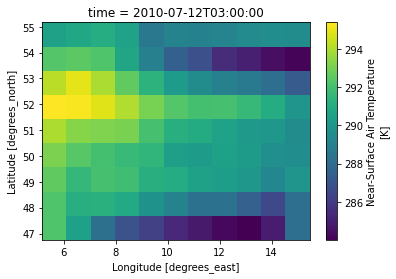

In [16]:
ds.tas.isel(time=1).plot()

<span style="color:red">**--> With metadata, the plotting routine automatically labels the plot with units .**</span>

## Step 4: Evaluate the netCDF files with the atmodat checker
*Notes* <br>
* Run the atmodat checker using the command `run_checks.py` from BASH terminal.
* Please note that the atmodat checker contains two modules:
    * one that checks the global attributes for compliance with the ATMODAT standard, 
    * and another that performs a standard CF check (building upon the cfchecks library).

#### Step 4.1: Show usage instructions of the `run_checks.py`

In [17]:
%%bash
run_checks.py --help

usage: run_checks.py [-h] [-v] [-op OPATH] [-cfv CFVERSION]
                     [-check WHATCHECKS] [-s] [-f FILE | -p PATH]

Run the AtMoDat checks suits.

optional arguments:
  -h, --help            show this help message and exit
  -v, --verbose         Print output of checkers (longer runtime due to double
                        call of checkers)
  -op OPATH, --opath OPATH
                        Define custom path where checker output shall be
                        written
  -cfv CFVERSION, --cfversion CFVERSION
                        Define custom CF table version against which the file
                        shall be checked. Valid are versions from 1.3 to 1.8.
                        Example: "-cfv 1.6". Default is 'auto'
  -check WHATCHECKS, --whatchecks WHATCHECKS
                        Define if AtMoDat or CF check or both shall be
                        executed. Valid options: AT, CF, both. Example:
                        "-check CF". Default is 'both'
  -s, --sum

#### Step 4.2: Check the file ALL_ATMODAT_ATTRIBUTES.nc and write checker output to output directory *myoutputdir*
*Notes* <br>
* Without specifying a user-defined output directory (-op flag), the atmodat checker would write the checker output into  ../checker_ouput/YYYYMMDD_HHMM
* We use the -s option to create summary checker output (files: short_summary.txt and long_summary_*.csv)

In [18]:
%%bash
run_checks.py -s -f demo_data/ALL_ATMODAT_ATTRIBUTES.nc -op myoutputdir

2021-10-01 06:39:23.896084 [INFO] :: PYESSV :: Loading vocabularies from /Users/angelika/Checker/atmodat_data_checker/AtMoDat_CVs/pyessv-archive:
2021-10-01 06:39:23.910365 [INFO] :: PYESSV :: ... loaded: atmodat
--- 1.7330 seconds for checking 1 files---


Running Compliance Checker on the datasets from: ['demo_data/ALL_ATMODAT_ATTRIBUTES.nc']


#### Step 4.3: Check content of the checker output directory myoutputdir

#### Step 4.3.1: List folders and subfolders

In [27]:
%%bash
echo $'\n=====  content of myoutputdir ===='
ls -g myoutputdir
echo $'\n=====  atmodat subdirectory with detailed checker output ===='
#echo '\n =====  atmodat subdirectory with detailed checker output ===='
ls -g myoutputdir/atmodat
echo $'\n======  CF subdirectory with detailed checker output ===='
ls -g myoutputdir/CF


=====  content of myoutputdir ====
total 32
drwxr-xr-x  3 staff   96  1 Okt 08:39 CF
drwxr-xr-x  3 staff   96  1 Okt 08:39 atmodat
-rw-r--r--  1 staff   49  1 Okt 08:39 long_summary_mandatory.csv
-rw-r--r--  1 staff   49  1 Okt 08:39 long_summary_optional.csv
-rw-r--r--  1 staff   49  1 Okt 08:39 long_summary_recommended.csv
-rw-r--r--  1 staff  332  1 Okt 08:39 short_summary.txt

=====  atmodat subdirectory with detailed checker output ====
total 32
-rw-r--r--  1 staff  13562  1 Okt 08:39 ALL_ATMODAT_ATTRIBUTES_atmodat_result.json

======  CF subdirectory with detailed checker output ====
total 8
-rw-r--r--  1 staff  693  1 Okt 08:39 ALL_ATMODAT_ATTRIBUTES_cfchecks_result.txt


#### Step 4.3.2: Show content of short_summary.txt that provides summary statistics on the atmodat checker and CF checker results  

In [28]:
%%bash
cat myoutputdir/short_summary.txt

Short summary of checks: 
 
Checking against: atmodat_standard:3.0, CF table version: 78
Version of the AtMoDat checker: 1.1.0
Checked at: 2021-10-01T08:39:24.911226
 
Number of checked files: 1
Total checks passed: 31/31
Mandatory checks passed: 4/4
Recommended checks passed: 18/18
Optional checks passed: 9/9
CF checker errors: 0

#### Step 4.3.3: Show content of long_summary_recommended.csv

In [29]:
%%bash
cat myoutputdir/long_summary_recommended.csv

File,Check level,Global Attribute,Error Message


<span style="color:red">**--> File contains all recommended metadata, so the long_summary has no entry except of the header .**</span>

#### Step 4.3: Check all files contained in directory demo_data and write checker output to output directory *myoutputdir2*
*Notes* <br>
* Let the checker run over all files contained in the entire directory demo_data (-p flag).
* Write checker output to output directory *myoutputdir2* (-op flag).
* We use the -s option to create summary checker output (files: short_summary.txt and long_summary_*.csv)

In [30]:
%%bash
run_checks.py -s -p demo_data/ -op myoutputdir2

2021-10-01 07:05:00.729570 [INFO] :: PYESSV :: Loading vocabularies from /Users/angelika/Checker/atmodat_data_checker/AtMoDat_CVs/pyessv-archive:
2021-10-01 07:05:00.739914 [INFO] :: PYESSV :: ... loaded: atmodat
2021-10-01 07:05:02.495367 [INFO] :: PYESSV :: Loading vocabularies from /Users/angelika/Checker/atmodat_data_checker/AtMoDat_CVs/pyessv-archive:
2021-10-01 07:05:02.500908 [INFO] :: PYESSV :: ... loaded: atmodat
2021-10-01 07:05:03.924808 [INFO] :: PYESSV :: Loading vocabularies from /Users/angelika/Checker/atmodat_data_checker/AtMoDat_CVs/pyessv-archive:
2021-10-01 07:05:03.930191 [INFO] :: PYESSV :: ... loaded: atmodat
2021-10-01 07:05:05.309958 [INFO] :: PYESSV :: Loading vocabularies from /Users/angelika/Checker/atmodat_data_checker/AtMoDat_CVs/pyessv-archive:
2021-10-01 07:05:05.315359 [INFO] :: PYESSV :: ... loaded: atmodat
2021-10-01 07:05:06.667711 [INFO] :: PYESSV :: Loading vocabularies from /Users/angelika/Checker/atmodat_data_checker/AtMoDat_CVs/pyessv-archive:
20

Running Compliance Checker on the datasets from: ['demo_data/WRONG_STANDARDNAME.nc']
Running Compliance Checker on the datasets from: ['demo_data/CMIP6_ATTRIBUTES.nc']
Running Compliance Checker on the datasets from: ['demo_data/NO_ATTRIBUTES.nc']
Running Compliance Checker on the datasets from: ['demo_data/MINUM_ATMODAT_ATTRIBUTES.nc']
Running Compliance Checker on the datasets from: ['demo_data/ALL_ATMODAT_ATTRIBUTES.nc']
Running Compliance Checker on the datasets from: ['demo_data/hope/hope_trop_pyrnet01_l1_ta_1.nc']


#### Step 4.4: Check content of the checker output directory myoutputdir2

##### Step 4.4.1: List folders and subfolders

In [31]:
%%bash
ls -g myoutputdir2
echo $'\n=====  atmodat subdirectory with detailed checker output ===='
#echo '\n =====  atmodat subdirectory with detailed checker output ===='
ls -g myoutputdir2/atmodat
echo $'\n======  CF subdirectory with detailed checker output ===='
ls -g myoutputdir2/CF

total 40
drwxr-xr-x  8 staff   256  1 Okt 09:05 CF
drwxr-xr-x  8 staff   256  1 Okt 09:05 atmodat
-rw-r--r--  1 staff   471  1 Okt 09:05 long_summary_mandatory.csv
-rw-r--r--  1 staff  3440  1 Okt 09:05 long_summary_optional.csv
-rw-r--r--  1 staff  6699  1 Okt 09:05 long_summary_recommended.csv
-rw-r--r--  1 staff   338  1 Okt 09:05 short_summary.txt

=====  atmodat subdirectory with detailed checker output ====
total 224
-rw-r--r--  1 staff  13562  1 Okt 09:05 ALL_ATMODAT_ATTRIBUTES_atmodat_result.json
-rw-r--r--  1 staff  15931  1 Okt 09:05 CMIP6_ATTRIBUTES_atmodat_result.json
-rw-r--r--  1 staff  17472  1 Okt 09:05 MINUM_ATMODAT_ATTRIBUTES_atmodat_result.json
-rw-r--r--  1 staff  16891  1 Okt 09:05 NO_ATTRIBUTES_atmodat_result.json
-rw-r--r--  1 staff  17460  1 Okt 09:05 WRONG_STANDARDNAME_atmodat_result.json
-rw-r--r--  1 staff  17787  1 Okt 09:05 hope_trop_pyrnet01_l1_ta_1_atmodat_result.json

======  CF subdirectory with detailed checker output ====
total 48
-rw-r--r--  1 staff 

##### Step 4.4.2: Show content of short_summary.txt that provides summary statistics on the atmodat checker and CF checker results  

In [32]:
%%bash
cat myoutputdir2/short_summary.txt

Short summary of checks: 
 
Checking against: atmodat_standard:3.0, CF table version: 78
Version of the AtMoDat checker: 1.1.0
Checked at: 2021-10-01T09:05:10.249867
 
Number of checked files: 6
Total checks passed: 56/184
Mandatory checks passed: 17/22
Recommended checks passed: 28/108
Optional checks passed: 11/54
CF checker errors: 1

##### Step 4.4.3: Show content of long_summary_mandatory.csv

In [33]:
%%bash
cat myoutputdir2/long_summary_mandatory.csv

File,Check level,Global Attribute,Error Message
,,,
CMIP6_ATTRIBUTES.nc,mandatory,Conventions,ATMODAT Standard information not present
,,,
NO_ATTRIBUTES.nc,mandatory,Conventions,global attribute is not present
NO_ATTRIBUTES.nc,mandatory,institution,global attribute is not present
,,,
hope_trop_pyrnet01_l1_ta_1.nc,mandatory,Conventions,ATMODAT Standard information not present
hope_trop_pyrnet01_l1_ta_1.nc,mandatory,institution,global attribute is not present


<span style="color:red">**--> lon_summary_mandatory.txt lists all mandatory errors detected in any file contained in the directory demo_data.** <br>
 – CMIP6_ATTRIBUTES.nc: The content of the global attribute *Conventions* is 'CF-1.7 CMIP-6.2' , but for meeting the ATMODAT Standard, this attribute has to be 'CF-1.8 ATMODAT-3.0' <br>
 – hope_trop_pyrnet01_l1_ta_1.nc: Spelling error;  Institution should be insitution
</span>

##### Step 4.4.4: Show content of long_summary_recommended.csv

In [34]:
%%bash
head -20 myoutputdir2/long_summary_recommended.csv

File,Check level,Global Attribute,Error Message
,,,
CMIP6_ATTRIBUTES.nc,recommended,creator,global attribute is not present
CMIP6_ATTRIBUTES.nc,recommended,crs,global attribute is not present
CMIP6_ATTRIBUTES.nc,recommended,geospatial_lat_resolution,global attribute is not present.
CMIP6_ATTRIBUTES.nc,recommended,geospatial_lon_resolution,global attribute is not present.
CMIP6_ATTRIBUTES.nc,recommended,geospatial_vertical_resolution,global attribute is not present
CMIP6_ATTRIBUTES.nc,recommended,keywords,global attribute is not present
CMIP6_ATTRIBUTES.nc,recommended,standard_name_vocabulary,global attribute is not present
CMIP6_ATTRIBUTES.nc,recommended,summary,global attribute is not present
,,,
MINUM_ATMODAT_ATTRIBUTES.nc,recommended,contact,global attribute is not present
MINUM_ATMODAT_ATTRIBUTES.nc,recommended,creation_date,global attribute is not present
MINUM_ATMODAT_ATTRIBUTES.nc,recommended,creator,global attribute is not present
MINUM_ATMODAT_ATTRIBUTES.nc,recommended,crs,glo

##### Step 4.4.5: Check which file provoked an error message in the CF checker

In [42]:
%%bash
CFinvalid=`grep -l nvalid myoutputdir2/CF/*.txt`
cat ${CFinvalid}

CHECKING NetCDF FILE: demo_data/WRONG_STANDARDNAME.nc
Using CF Checker Version 4.1.0
Checking against CF Version CF-1.8
Using Standard Name Table Version 78 (2021-09-21T11:55:06Z)
Using Area Type Table Version 10 (23 June 2020)
Using Standardized Region Name Table Version 4 (18 December 2018)


------------------
Checking variable: lat
------------------

------------------
Checking variable: lon
------------------

------------------
Checking variable: ps
------------------
INFO: (3.1): No units attribute set.  Please consider adding a units attribute for completeness.

------------------
Checking variable: tas
------------------

------------------
Checking variable: time
------------------
ERROR: (3.3): Invalid standard_name: times

ERRORS detected: 1
WARNINGS given: 0
INFORMATION messages: 1


##### Step 4.4.6: Check how the CF checker output looks like for NO_ATTRIBUTES.nc

In [43]:
%%bash
cat myoutputdir2/CF/NO_ATTRIBUTES_cfchecks_result.txt


CHECKING NetCDF FILE: demo_data/NO_ATTRIBUTES.nc
WARN: Cannot determine CF version from the Conventions attribute; checking against latest CF version: CF-1.8
Using CF Checker Version 4.1.0
Checking against CF Version CF-1.8
Using Standard Name Table Version 78 (2021-09-21T11:55:06Z)
Using Area Type Table Version 10 (23 June 2020)
Using Standardized Region Name Table Version 4 (18 December 2018)

WARN: (2.6.1): No 'Conventions' attribute present

------------------
Checking variable: lat
------------------
WARN: (3): No standard_name or long_name attribute specified
WARN: (3.1): units attribute should be present

------------------
Checking variable: lon
------------------
WARN: (3): No standard_name or long_name attribute specified
WARN: (3.1): units attribute should be present

------------------
Checking variable: ps
------------------
WARN: (3): No standard_name or long_name attribute specified
INFO: (3.1): No units attribute set.  Please consider adding a units attribute for comple

<span style="color:red">**--> cfchecks routine only issues a warning/information message if variable metadata are completely missing.** <br>
 – Zero errors in the cfchecks routine does not necessarily mean that a data file is CF compliant!' <br>
 – We have to enhance the atmodat checker output to capture insufficient variable metadata.
</span>

# APPENDIX

#### How the CMIP6 sample files were prepared 
See more details on the CMIP6 experiment: https://cera-www.dkrz.de/WDCC/ui/cerasearch/cmip6?input=CMIP6.CMIP.MPI-M.MPI-ESM1-2-HR.historical <br>

##### Merge the variables ps and tas into a single netCDF file, subset region of Germany and select the day 2010-07-12

##### Modify the CMIP6 metadata to create the files: NOATTRIBUTES.nc, MINUM_ATMODAT_ATTRIBUTES.nc, WRONG_STANDARD_NAME.nc

##### Modify the CMIP6 metadata to create the file: ALL_ATMODAT_ATTRIBUTES.nc